In [4]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix

In [5]:
raw_data_file_name= "Clustered_Data/dilum_sir_route.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,acceY,anomaly,cluster,lat,lon,time
0,10.262656,A,0,6.757848,79.951910,1538098935758
1,10.156688,A,0,6.757848,79.951910,1538098936060
2,10.071455,A,1,6.751704,79.954650,1538099033699
3,10.029700,A,1,6.751704,79.954650,1538099033998
4,10.049045,A,2,6.751611,79.954563,1538099035718


In [6]:
raw_data.shape

(417, 6)

In [8]:
raw_data = raw_data.sort_values(by=['cluster'])

In [11]:
raw_data.head(20)

,acceY,anomaly,cluster,lat,lon,time
0,10.262656,A,0,6.757848,79.951910,1538098935758
1,10.156688,A,0,6.757848,79.951910,1538098936060
300,10.061974,A,0,6.757820,79.951904,1538358200131
150,10.262656,A,0,6.757848,79.951910,1538098935758
151,10.156688,A,0,6.757848,79.951910,1538098936060
2,10.071455,A,1,6.751704,79.954650,1538099033699
3,10.029700,A,1,6.751704,79.954650,1538099033998
301,10.418710,A,1,6.751708,79.954682,1538358330791
152,10.071455,A,1,6.751704,79.954650,1538099033699
153,10.029700,A,1,6.751704,79.954650,1538099033998


In [16]:
raw_data = raw_data.drop_duplicates(subset= 'cluster',  keep='first')
raw_data.shape

(50, 6)

In [18]:
raw_data.head(5)

,acceY,anomaly,cluster,lat,lon,time
0,10.262656,A,0,6.757848,79.951910,1538098935758
2,10.071455,A,1,6.751704,79.954650,1538099033699
304,10.271706,A,2,6.751599,79.954554,1538358333211
157,10.029412,A,3,6.751562,79.954525,1538099037320
163,10.128293,A,4,6.751405,79.954408,1538099040138


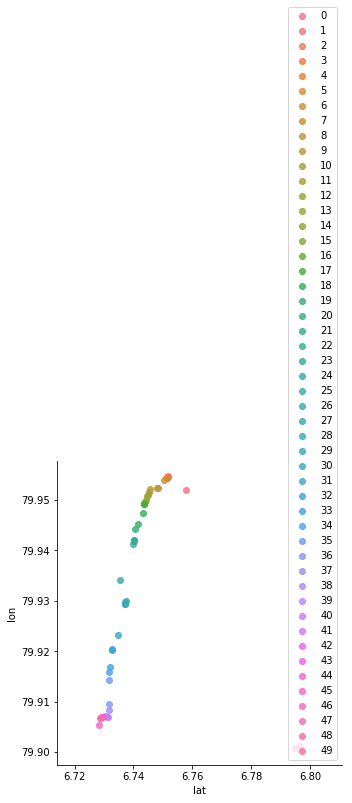

In [19]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=raw_data, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')

In [21]:
raw_data.to_json("Map_data/dilum_sir_route.json", orient='records')